# Importing initial Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

Uploading Data which is in excel format

In [2]:
df_train=pd.read_excel('Doctor_Fees_Train.xlsx')

In [3]:
# Checking Top 5 rows
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
# Looking for last 5 rows
df_train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [5]:
# Finding shape of data
df_train.shape

(5961, 7)

In [6]:
# Finid out the columns name

df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [7]:
# info about the data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
# checking for null values

df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

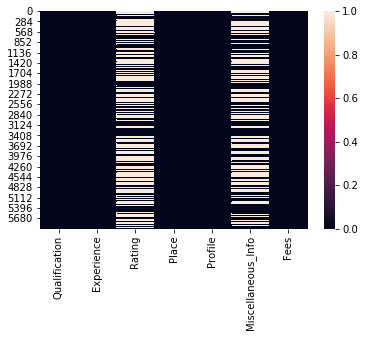

In [9]:
# checking for null values through heatmap

sns.heatmap(df_train.isnull())

In [10]:
# Lets treat those nul values first

df_train=df_train.fillna(method='ffill')

In [11]:
df_train.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

So there is no null value left

In [12]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

lets remove Miscellaneous column as i dont feel its any importance to us.

In [13]:
df_train.drop(["Miscellaneous_Info"],axis=1,inplace=True)

In [14]:
# NOW check the top 5 rows again

df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,98%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,98%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [15]:
#lets check the value counts

df_train["Qualification"].value_counts()

BDS                                                                                                                                                  488
BHMS                                                                                                                                                 477
BAMS                                                                                                                                                 471
MBBS                                                                                                                                                 334
MBBS, MS - ENT                                                                                                                                       220
                                                                                                                                                    ... 
DNB - General Medicine, FRCP, MBBS                                                

In [16]:
df_train["Place"].value_counts()

HSR Layout, Bangalore       76
Andheri West, Mumbai        71
Dwarka, Delhi               67
Banjara Hills, Hyderabad    65
Mulund West, Mumbai         54
                            ..
Darya Ganj, Delhi            1
Madanpura, Mumbai            1
Paradise, Hyderabad          1
Muvattupuzha, Ernakulam      1
Chullickal, Ernakulam        1
Name: Place, Length: 877, dtype: int64

In [17]:
df_train["Experience"].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
66 years experience      1
65 years experience      1
58 years experience      1
60 years experience      1
64 years experience      1
Name: Experience, Length: 64, dtype: int64

In [18]:
df_train["Profile"].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [19]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees'], dtype='object')

# Univariate Analysis

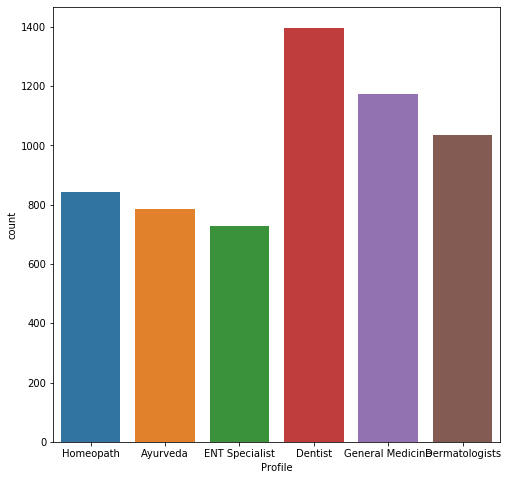

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(df_train["Profile"])

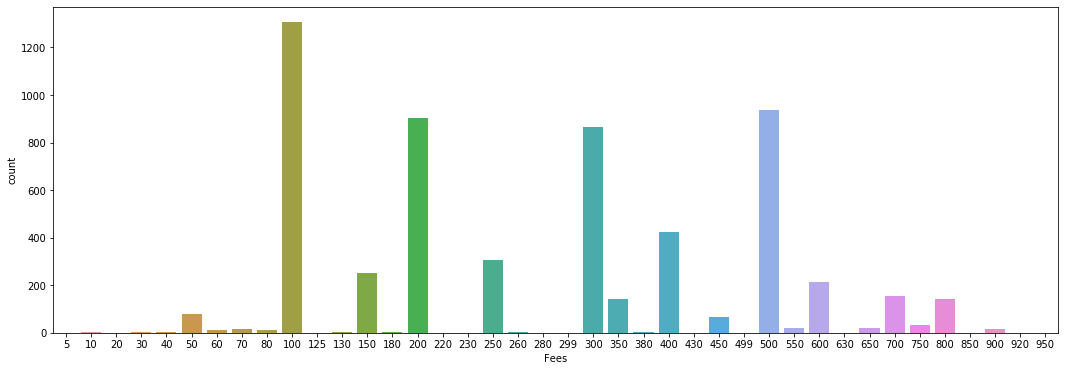

In [21]:
plt.figure(figsize=(18,6))
sns.countplot(df_train["Fees"])

# Bivariate Analysis

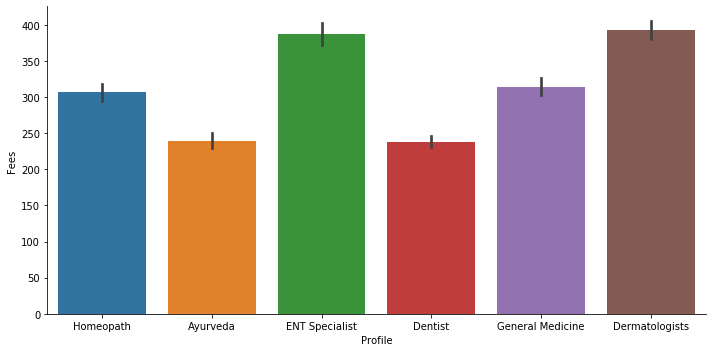

In [22]:
sns.catplot(x="Profile",y="Fees",kind="bar",data=df_train,aspect=2)

ENT specialist and Dermatologist ahs the highest fees

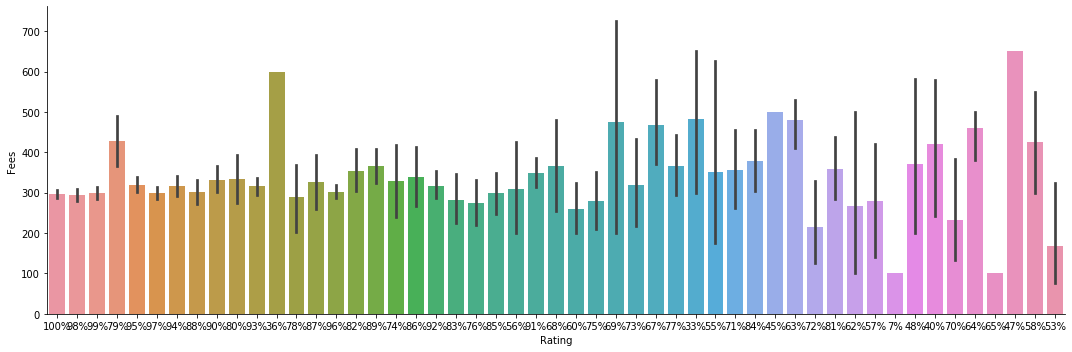

In [23]:
sns.catplot(x="Rating",y="Fees",kind="bar",data=df_train,aspect=3)

# Preprocessing the data

In [24]:
# importing library to encode string varibles into integers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_train["Qualification"]=le.fit_transform(df_train["Qualification"])
df_train["Experience"]=le.fit_transform(df_train["Experience"])
df_train["Rating"]=le.fit_transform(df_train["Rating"])
df_train["Place"]=le.fit_transform(df_train["Place"])
df_train["Profile"]=le.fit_transform(df_train["Profile"])

In [25]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,49,457,3,300
3,464,3,49,68,0,250
4,10,12,0,337,0,250


Now all the categorical data has been converted into numerical

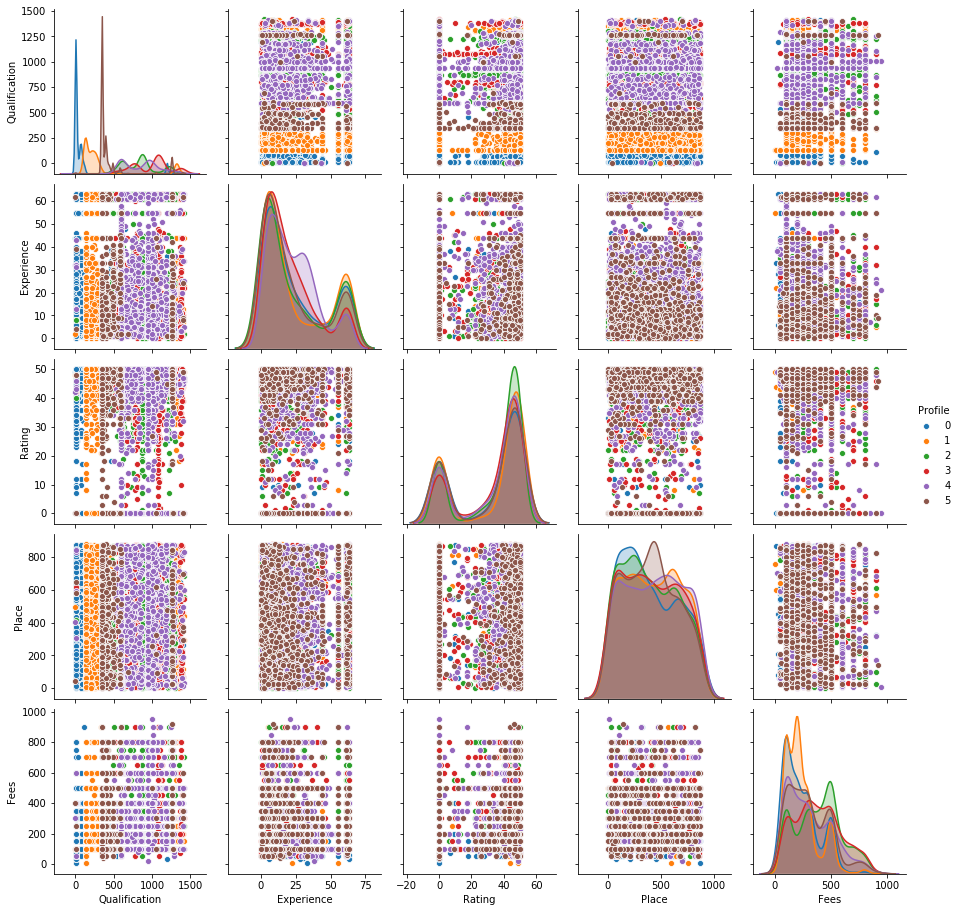

In [26]:
sns.pairplot(df_train,hue="Profile")

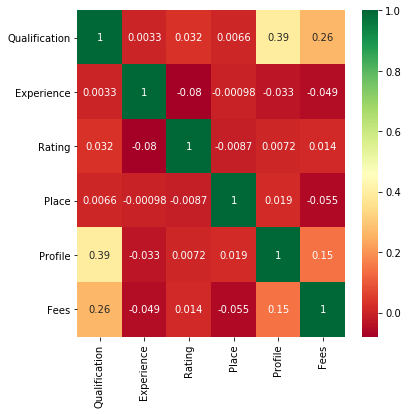

In [27]:
plt.figure(figsize=(6,6))
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")

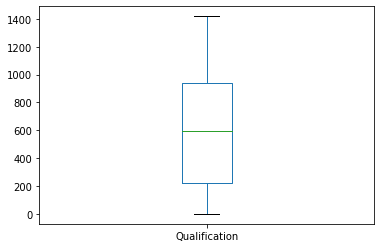

In [28]:
#lets check for outliers

df_train["Qualification"].plot.box()

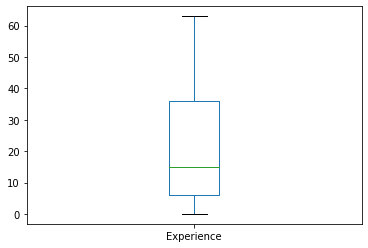

In [29]:
df_train["Experience"].plot.box()

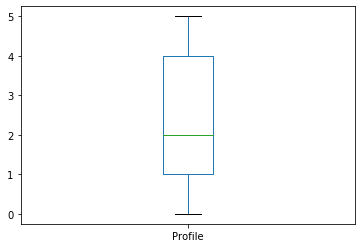

In [30]:
df_train["Profile"].plot.box()

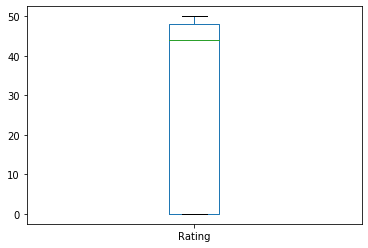

In [31]:
df_train["Rating"].plot.box()

so there seems to be no outliers present in data

In [32]:
# Lets check for the skewness

df_train.skew()

Qualification    0.239720
Experience       0.823531
Rating          -0.840796
Place            0.118410
Profile          0.108803
Fees             0.751870
dtype: float64

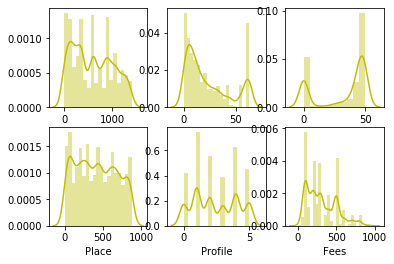

In [33]:
# Checking the distribution of data

fig, axes = plt.subplots(nrows=2, ncols=3)

for i, column in enumerate(df_train.columns):
    sns.distplot(df_train[column],ax=axes[i//3,i%3],color='y')

In [34]:
# Lets divide the data in to  input and target variables

x=df_train.drop(["Fees"],axis=1)

y=df_train["Fees"]


# Importing Libraries for model selection

In [39]:
# normalizing the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score



# Train Test Split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4768, 5)
(4768,)
(1193, 5)
(1193,)


In [40]:
# for finding best random state  as parameter

max_r_score=0
for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        y_pred = lr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
print("Max r2 score corresponding to ",final_r_state," is",max_r_score)

r2_score corresponding to random state  42 is:  0.07787054930123005
r2_score corresponding to random state  43 is:  0.08040704826571166
r2_score corresponding to random state  44 is:  0.09459930830897934
r2_score corresponding to random state  45 is:  0.07115822487261192
r2_score corresponding to random state  46 is:  0.059294583377343946
r2_score corresponding to random state  47 is:  0.05653983152610942
r2_score corresponding to random state  48 is:  0.07019244364245847
r2_score corresponding to random state  49 is:  0.09050723947529904
r2_score corresponding to random state  50 is:  0.07762535033039042
r2_score corresponding to random state  51 is:  0.07215918141043065
r2_score corresponding to random state  52 is:  0.04605929587002433
r2_score corresponding to random state  53 is:  0.058637660122422886
r2_score corresponding to random state  54 is:  0.07113044825757653
r2_score corresponding to random state  55 is:  0.07459893359052105
r2_score corresponding to random state  56 is:

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=74)

In [42]:
LR=LinearRegression()
LS=Lasso(random_state=74)
RD=Ridge(random_state=74)
KNR=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=74)
RFR=RandomForestRegressor(random_state=74)
GBR=GradientBoostingRegressor(random_state=74)
ABR=AdaBoostRegressor(random_state=74)

In [43]:
models = []
models.append(('LinearRegression', LR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('KNeighborseRegressor',KNR))
models.append(('SVR', SV))
models.append(('DecisionTreeRegressor', DTR))
models.append(('RandomForestRegressor', RFR))
models.append(('GradientBoostingRegressor', GBR))
models.append(('AdaBoostRegressor',ABR))

In [44]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    r2_scr=r2_score(y_test,pred)
    print('R2_score = ',r2_scr)
    R2_score.append(r2_scr)
    
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root Mean Square Error = ",rmse)
    RMSE.append(rmse) 
    
    
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.09583835458330636
Mean_Squared_Error = 33930.32044223331
Root Mean Square Error =  184.2018470109171
Cross_Val_Score =  0.07359680045874387



********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=74,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.09539133243659137
Mean_Squared_Error = 33947.095766379935
Root Mean Square Error =  184.2473765522319
Cross_Val_Score =  0.07384750882102561



********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=74, solver='auto', tol=0.001)
R2_score =  0.09583422431558342
Mean_Squ

In [45]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Root Mean Square Error': RMSE, 'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Root Mean Square Error,Cross_val_score
0,LinearRegression,0.095838,33930.320442,184.201847,0.073597
1,Lasso,0.095391,33947.095766,184.247377,0.073848
2,Ridge,0.095834,33930.475438,184.202268,0.073597
3,KNeighborseRegressor,0.018153,36845.620620,191.952131,-0.015306
4,SVR,0.064712,35098.385577,187.345631,0.048209
5,DecisionTreeRegressor,-0.547145,58059.450964,240.955288,-0.637959
6,RandomForestRegressor,0.161476,31467.140075,177.389797,0.125652
7,GradientBoostingRegressor,0.192647,30297.389273,174.061453,0.178378
8,AdaBoostRegressor,0.096699,33898.032694,184.114184,0.080064


From here we can select Gradient Boosting regressor as our final model as it has highest r2_score

In [47]:
# for saving our model

from sklearn.externals import joblib
joblib.dump(GBR,"Doctor_Fees_Prediction.obj")

['Doctor_Fees_Prediction.obj']

In [48]:
# testing our model

model=joblib.load("Doctor_Fees_Prediction.obj")
model.predict(x_test)

array([268.55179766, 231.68629157, 270.10065531, ..., 242.71534397,
       402.05734426, 372.40146975])

# Complete